In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
os.getcwd()

'C:\\Users\\bahad\\GitHub\\Research\\Models'

In [3]:
calender=pd.read_csv("D:/Datasets/m5-forecasting-accuracy/calendar.csv")

In [4]:
data=pd.read_csv("D:/Datasets/m5-forecasting-accuracy/sales_train_evaluation.csv")

In [5]:
data_val=pd.read_csv("D:/Datasets/m5-forecasting-accuracy/sales_train_validation.csv")

In [6]:
submit=pd.read_csv("D:/Datasets/m5-forecasting-accuracy/sample_submission.csv")

In [7]:
price=pd.read_csv("D:/Datasets/m5-forecasting-accuracy/sell_prices.csv")

# Data Preperation

### Data selection criterias

In [8]:
data_val.cat_id.value_counts().sort_values(ascending=False)

FOODS        14370
HOUSEHOLD    10470
HOBBIES       5650
Name: cat_id, dtype: int64

In [9]:
data_val.store_id.value_counts().sort_index()

CA_1    3049
CA_2    3049
CA_3    3049
CA_4    3049
TX_1    3049
TX_2    3049
TX_3    3049
WI_1    3049
WI_2    3049
WI_3    3049
Name: store_id, dtype: int64

# Hierarchy decision

In [10]:
data_val["Total_sales"]=data_val.iloc[:, 6:1919].sum(axis=1)

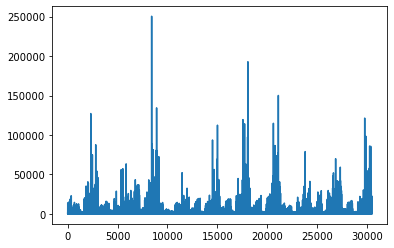

In [11]:
plt.plot(data_val.Total_sales)

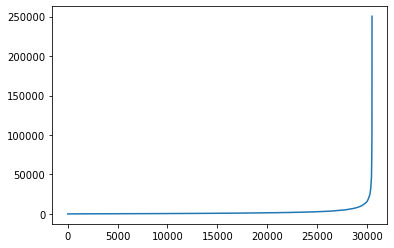

In [12]:
plt.plot(data_val.sort_values("Total_sales", ignore_index=True).Total_sales)

## Hierarchy Selection

In [13]:
A_id=data_val.sort_values("Total_sales", ignore_index=True).iloc[:10164, 0]
B_id=data_val.sort_values("Total_sales", ignore_index=True).iloc[10164:20328, 0]
C_id=data_val.sort_values("Total_sales", ignore_index=True).iloc[20328:, 0]

## Data Selection by B group Information

In [14]:
control=data_val[data_val.iloc[:,0].isin(B_id)].copy()
control.reset_index(inplace=True)

In [15]:
control

,index,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,Total_sales
0,0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,3,0,1,1,1,3,0,1,1,600
1,1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,0,0,0,1,0,0,0,0,493
2,9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,...,0,0,0,0,0,0,2,0,2,1376
3,11,HOBBIES_1_012_CA_1_validation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,0,2,0,...,0,1,0,0,0,1,0,0,0,754
4,12,HOBBIES_1_013_CA_1_validation,HOBBIES_1_013,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,...,0,2,1,0,0,0,0,1,1,493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10159,30483,FOODS_3_821_WI_3_validation,FOODS_3_821,FOODS_3,FOODS,WI_3,WI,0,0,0,...,2,1,0,2,0,0,0,4,0,1232
10160,30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,...,0,0,0,0,0,1,0,0,1,1022
10161,30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,...,0,0,0,0,0,0,0,1,0,720
10162,30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,...,0,1,0,0,1,0,3,1,3,702


In [16]:
long_control=pd.wide_to_long(control, stubnames=["d_"], i="id", j="day")
long_control.rename(columns={"d_":"Sales"},inplace=True)

## Calander and Long Dataset

In [17]:
calender.tail()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


### RegEx

In [18]:
import re

In [19]:
long_control.index[2]

('HOBBIES_1_010_CA_1_validation', 1)

In [20]:
calender["numeric_day"]=calender.d.str.extract("(\d+)").astype(int)
calender.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,numeric_day
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0,2
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0,3
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0,4
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1,5


In [21]:
new_control=pd.merge(long_control,calender,how="left", left_on="day", right_on="numeric_day",left_index=True)

In [22]:
pd.set_option("display.max_columns", None)

In [23]:
new_control.head()

,dept_id,store_id,index,cat_id,state_id,Total_sales,item_id,Sales,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,numeric_day
0,HOBBIES_1,CA_1,0,HOBBIES,CA,600,HOBBIES_1_001,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1
0,HOBBIES_1,CA_1,1,HOBBIES,CA,493,HOBBIES_1_002,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1
0,HOBBIES_1,CA_1,9,HOBBIES,CA,1376,HOBBIES_1_010,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1
0,HOBBIES_1,CA_1,11,HOBBIES,CA,754,HOBBIES_1_012,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1
0,HOBBIES_1,CA_1,12,HOBBIES,CA,493,HOBBIES_1_013,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1


## Price and New DataFrame

In [24]:
price.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [25]:
new_control.head()

,dept_id,store_id,index,cat_id,state_id,Total_sales,item_id,Sales,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,numeric_day
0,HOBBIES_1,CA_1,0,HOBBIES,CA,600,HOBBIES_1_001,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1
0,HOBBIES_1,CA_1,1,HOBBIES,CA,493,HOBBIES_1_002,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1
0,HOBBIES_1,CA_1,9,HOBBIES,CA,1376,HOBBIES_1_010,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1
0,HOBBIES_1,CA_1,11,HOBBIES,CA,754,HOBBIES_1_012,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1
0,HOBBIES_1,CA_1,12,HOBBIES,CA,493,HOBBIES_1_013,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1


In [26]:
data=pd.merge(new_control, price, how="left",left_on=["item_id", "wm_yr_wk", "store_id"], right_on=["item_id", "wm_yr_wk","store_id"])

### Obtained Dataset for Model

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19443732 entries, 0 to 19443731
Data columns (total 24 columns):
 #   Column        Dtype  
---  ------        -----  
 0   dept_id       object 
 1   store_id      object 
 2   index         int64  
 3   cat_id        object 
 4   state_id      object 
 5   Total_sales   int64  
 6   item_id       object 
 7   Sales         int64  
 8   date          object 
 9   wm_yr_wk      int64  
 10  weekday       object 
 11  wday          int64  
 12  month         int64  
 13  year          int64  
 14  d             object 
 15  event_name_1  object 
 16  event_type_1  object 
 17  event_name_2  object 
 18  event_type_2  object 
 19  snap_CA       int64  
 20  snap_TX       int64  
 21  snap_WI       int64  
 22  numeric_day   int32  
 23  sell_price    float64
dtypes: float64(1), int32(1), int64(10), object(12)
memory usage: 3.5+ GB


In [28]:
data.head()

,dept_id,store_id,index,cat_id,state_id,Total_sales,item_id,Sales,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,numeric_day,sell_price
0,HOBBIES_1,CA_1,0,HOBBIES,CA,600,HOBBIES_1_001,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1,NaN
1,HOBBIES_1,CA_1,1,HOBBIES,CA,493,HOBBIES_1_002,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1,NaN
2,HOBBIES_1,CA_1,9,HOBBIES,CA,1376,HOBBIES_1_010,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1,3.17
3,HOBBIES_1,CA_1,11,HOBBIES,CA,754,HOBBIES_1_012,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1,5.98
4,HOBBIES_1,CA_1,12,HOBBIES,CA,493,HOBBIES_1_013,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0,1,NaN


In [29]:
data.drop(["index"], axis=1, inplace=True)

# Feature Conversion

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
hot_encoder=OneHotEncoder()

In [32]:
data["state_id"]=data["state_id"].astype("str")
data["item_id"]=data["item_id"].astype("str")
data["weekday"]=data["weekday"].astype("str")

In [33]:
data["weekday"]=data["weekday"].astype("str")

In [34]:
data.drop(["wday", "wm_yr_wk", "d", "numeric_day"], axis=1, inplace=True)

## State Information

In [35]:
encoded_state=hot_encoder.fit_transform(data[["state_id"]])
array_stateholidays=encoded_state.toarray()
state_df=pd.DataFrame(array_stateholidays,columns=["CA", "TX", "WI"])

## Weekday Information

In [36]:
encoded_weekday=hot_encoder.fit_transform(data[["weekday"]])
array_weekday=encoded_weekday.toarray()

In [37]:
hot_encoder.categories_

[array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
        'Wednesday'], dtype=object)]

In [38]:
weekday_df=pd.DataFrame(array_weekday,columns=['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday','Wednesday'])

## Month Information

In [39]:
data["month"]=data["month"].astype(object)

In [40]:
encoded_months=hot_encoder.fit_transform(data[["month"]])
array_month=encoded_months.toarray()

In [41]:
hot_encoder.categories_

[array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype=object)]

In [42]:
month_df=pd.DataFrame(array_month,columns=["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Agu", "Sep", "Oct", "Nov", "Dec"])

## Year Information

In [43]:
data["year"]=data["year"].astype(object)

In [44]:
encoded_years=hot_encoder.fit_transform(data[["year"]])
array_year=encoded_years.toarray()

In [45]:
hot_encoder.categories_

[array([2011, 2012, 2013, 2014, 2015, 2016], dtype=object)]

In [46]:
year_df=pd.DataFrame(array_year,columns=["_2011", "_2012", "_2013", "_2014", "_2015", "_2016"])

# Adding Features

In [47]:
frames = [data, state_df ,weekday_df, month_df, year_df]
data=pd.concat(frames, axis=1)

### Data Saving

In [48]:
path=r'D:/Datasets/m5-forecasting-accuracy/Obtained_Data/'

In [49]:
#data.to_csv(path+'big_data.csv')

# Dropping Features

In [50]:
data.drop(["weekday", "month", "year"], axis=1, inplace=True)

## Item Selection

In [51]:
data.head()

,dept_id,store_id,cat_id,state_id,Total_sales,item_id,Sales,date,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,CA,TX,WI,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016
0,HOBBIES_1,CA_1,HOBBIES,CA,600,HOBBIES_1_001,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,HOBBIES_1,CA_1,HOBBIES,CA,493,HOBBIES_1_002,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,HOBBIES_1,CA_1,HOBBIES,CA,1376,HOBBIES_1_010,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,3.17,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,HOBBIES_1,CA_1,HOBBIES,CA,754,HOBBIES_1_012,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,5.98,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,HOBBIES_1,CA_1,HOBBIES,CA,493,HOBBIES_1_013,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [52]:
data[data["dept_id"]== "HOBBIES_1"].item_id.value_counts()

HOBBIES_1_281    19130
HOBBIES_1_358    19130
HOBBIES_1_276    17217
HOBBIES_1_025    17217
HOBBIES_1_238    17217
                 ...  
HOBBIES_1_422     1913
HOBBIES_1_209     1913
HOBBIES_1_408     1913
HOBBIES_1_026     1913
HOBBIES_1_251     1913
Name: item_id, Length: 314, dtype: int64

In [53]:
data.item_id.value_counts()

FOODS_2_317        19130
HOUSEHOLD_2_096    19130
FOODS_2_180        19130
FOODS_3_677        19130
FOODS_3_268        19130
                   ...  
HOBBIES_1_259       1913
FOODS_3_207         1913
FOODS_3_139         1913
FOODS_3_029         1913
HOUSEHOLD_1_443     1913
Name: item_id, Length: 2264, dtype: int64

## State Selection

In [54]:
data[data["item_id"]=="HOBBIES_2_115"].store_id.value_counts()

CA_3    1913
CA_4    1913
CA_1    1913
TX_3    1913
WI_1    1913
TX_2    1913
WI_2    1913
WI_3    1913
TX_1    1913
CA_2    1913
Name: store_id, dtype: int64

# Group By

In [55]:
data_control=data.copy()

In [56]:
data_group=data_control.groupby(by=["dept_id", "store_id", "date"]).agg({"Total_sales":"first", 
                                                                "state_id":"first", 
                                                                "cat_id":"first",
                                                                "Sales":"sum",
                                                                "event_name_1":"first",
                                                                "event_type_1":"first",
                                                                "event_name_2":"first",
                                                                "event_type_2":"first",
                                                                "snap_CA":"first",
                                                                "snap_TX":"first",
                                                                "snap_WI":"first",
                                                                "sell_price":["mean", "median", "std"],
                                                                "CA":"first",
                                                                "TX":"first",
                                                                "WI":"first",
                                                                "Friday":"first",
                                                                "Monday":"first",
                                                                "Saturday":"first",
                                                                "Sunday":"first",
                                                                "Thursday":"first",
                                                                "Tuesday":"first",
                                                                "Wednesday":"first",
                                                                "Jan":"first",
                                                                "Feb":"first",
                                                                "Mar":"first",
                                                                "Apr":"first",
                                                                "May":"first",
                                                                "June":"first",
                                                                "July":"first",
                                                                "Agu":"first",
                                                                "Sep":"first",
                                                                "Oct":"first",
                                                                "Nov":"first",
                                                                "Dec":"first",
                                                                "_2011":"first",
                                                                "_2012":"first",
                                                                "_2013":"first",
                                                                "_2014":"first",
                                                                "_2015":"first",
                                                                "_2016":"first",
                                                               })

In [57]:
data_group.columns = data_group.columns.droplevel(1)

## New Column Names

In [58]:
data_group.columns.values[11]="sell_price_mean"
data_group.columns.values[12]="sell_price_median"
data_group.columns.values[13]="sell_price_std"

# Visual Comparison

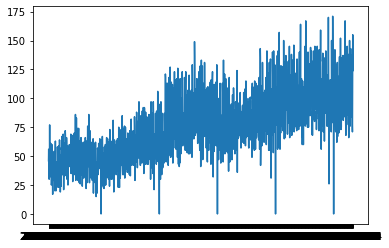

In [59]:
plt.plot(data_group.loc[("HOBBIES_1"), ("CA_1")].Sales)

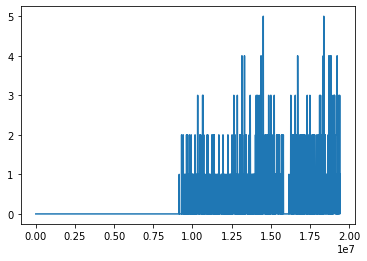

In [60]:
plt.plot(data[(data["item_id"]=="HOBBIES_1_001") & (data["store_id"]=="CA_1")].Sales)

# Normal İlk Dataset'lerin oluşumu

In [61]:
data.groupby("item_id").agg({"Sales":"sum"})

,Sales
item_id,
FOODS_1_001,6228
FOODS_1_002,6556
FOODS_1_003,3985
FOODS_1_005,2240
FOODS_1_006,2316
...,...
HOUSEHOLD_2_510,3833
HOUSEHOLD_2_511,5295
HOUSEHOLD_2_512,6601


In [62]:
data[data["item_id"]=="FOODS_1_001"].groupby("store_id").agg({"Sales":"sum"})

,Sales
store_id,
CA_4,688
TX_1,1119
TX_2,1112
TX_3,785
WI_1,1086
WI_2,875
WI_3,563


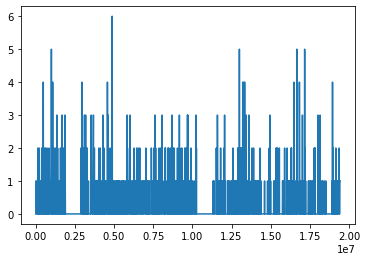

In [63]:
plt.plot(data[(data["item_id"]=="FOODS_1_001") & (data["store_id"]=="CA_4")].Sales)

## First Version: 1 product + 1 store

In [64]:
first_data=data[(data["item_id"]=="FOODS_1_001") & (data["store_id"]=="TX_1")]
first_data.reset_index(drop=True, inplace=True)

In [65]:
first_data.head()

,dept_id,store_id,cat_id,state_id,Total_sales,item_id,Sales,date,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,CA,TX,WI,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016
0,FOODS_1,TX_1,FOODS,TX,1119,FOODS_1_001,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,FOODS_1,TX_1,FOODS,TX,1119,FOODS_1_001,1,2011-01-30,NaN,NaN,NaN,NaN,0,0,0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,FOODS_1,TX_1,FOODS,TX,1119,FOODS_1_001,1,2011-01-31,NaN,NaN,NaN,NaN,0,0,0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,FOODS_1,TX_1,FOODS,TX,1119,FOODS_1_001,0,2011-02-01,NaN,NaN,NaN,NaN,1,1,0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,FOODS_1,TX_1,FOODS,TX,1119,FOODS_1_001,0,2011-02-02,NaN,NaN,NaN,NaN,1,0,1,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [66]:
first_data.drop(["dept_id", "item_id", "store_id", "Total_sales", "state_id", "cat_id"], axis=1, inplace=True)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Data Saving

In [67]:
first_data.to_csv(path+'first_scenario.csv')

## Second Version: 1 product + 1 state

In [68]:
second_data=data[(data["item_id"]=="FOODS_1_001") & (data["state_id"]=="TX")]
second_data.reset_index(drop=True, inplace=True)

In [69]:
second_data.head()

,dept_id,store_id,cat_id,state_id,Total_sales,item_id,Sales,date,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,CA,TX,WI,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016
0,FOODS_1,TX_1,FOODS,TX,1119,FOODS_1_001,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,FOODS_1,TX_2,FOODS,TX,1112,FOODS_1_001,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,FOODS_1,TX_3,FOODS,TX,785,FOODS_1_001,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,FOODS_1,TX_1,FOODS,TX,1119,FOODS_1_001,1,2011-01-30,NaN,NaN,NaN,NaN,0,0,0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,FOODS_1,TX_2,FOODS,TX,1112,FOODS_1_001,0,2011-01-30,NaN,NaN,NaN,NaN,0,0,0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [70]:
second_data.drop(["dept_id", "item_id", "state_id", "cat_id"], axis=1, inplace=True)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Data Saving

In [71]:
second_data.to_csv(path+'second_scenario.csv')

## Third Version: 1 product group + all states

In [72]:
third_data=data[data["item_id"]=="FOODS_1_001"]
third_data.reset_index(drop=True, inplace=True)

In [73]:
third_data.head()

,dept_id,store_id,cat_id,state_id,Total_sales,item_id,Sales,date,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,CA,TX,WI,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016
0,FOODS_1,CA_4,FOODS,CA,688,FOODS_1_001,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,FOODS_1,TX_1,FOODS,TX,1119,FOODS_1_001,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,FOODS_1,TX_2,FOODS,TX,1112,FOODS_1_001,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,FOODS_1,TX_3,FOODS,TX,785,FOODS_1_001,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,FOODS_1,WI_1,FOODS,WI,1086,FOODS_1_001,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [74]:
third_data.drop(["dept_id", "item_id", "cat_id"], axis=1, inplace=True)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Data Saving

In [75]:
third_data.to_csv(path+'third_scenario.csv')

# Group By ile Data Oluşturma

In [76]:
data_group.reset_index(inplace=True)

In [77]:
data_group.groupby(["dept_id"]).agg({"Sales":"sum"})

,Sales
dept_id,
FOODS_1,757815
FOODS_2,1272363
FOODS_3,2437835
HOBBIES_1,1240364
HOBBIES_2,197155
HOUSEHOLD_1,1848167
HOUSEHOLD_2,1314405


## First Version: 1 Group + 1 store

In [78]:
data_group[(data_group["dept_id"]=="HOBBIES_1")].store_id.value_counts()

CA_3    1913
CA_4    1913
CA_1    1913
TX_3    1913
WI_1    1913
TX_2    1913
WI_2    1913
WI_3    1913
TX_1    1913
CA_2    1913
Name: store_id, dtype: int64

In [79]:
first_data_group=data_group[(data_group["dept_id"]=="HOBBIES_1") & (data_group["store_id"]=="TX_1")]
first_data_group.reset_index(drop=True, inplace=True)

In [80]:
first_data_group.head()

,dept_id,store_id,date,Total_sales,state_id,cat_id,Sales,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,CA,TX,WI,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016
0,HOBBIES_1,TX_1,2011-01-29,1124,TX,HOBBIES,58,NaN,NaN,NaN,NaN,0,0,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,HOBBIES_1,TX_1,2011-01-30,1124,TX,HOBBIES,62,NaN,NaN,NaN,NaN,0,0,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,HOBBIES_1,TX_1,2011-01-31,1124,TX,HOBBIES,41,NaN,NaN,NaN,NaN,0,0,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,HOBBIES_1,TX_1,2011-02-01,1124,TX,HOBBIES,46,NaN,NaN,NaN,NaN,1,1,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,HOBBIES_1,TX_1,2011-02-02,1124,TX,HOBBIES,28,NaN,NaN,NaN,NaN,1,0,1,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [81]:
first_data_group.drop(["dept_id", "store_id", "Total_sales", "state_id", "cat_id"], axis=1, inplace=True)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Data Saving

In [82]:
#first_data_group.to_csv(path+'first_scenario_group.csv')

## Second Version: 1 product + 1 state

In [83]:
second_data_group=data_group[(data_group["dept_id"]=="HOBBIES_1") & (data_group["state_id"]=="TX")]
second_data_group.reset_index(drop=True, inplace=True)

In [84]:
second_data_group.head()

,dept_id,store_id,date,Total_sales,state_id,cat_id,Sales,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,CA,TX,WI,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016
0,HOBBIES_1,TX_1,2011-01-29,1124,TX,HOBBIES,58,NaN,NaN,NaN,NaN,0,0,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,HOBBIES_1,TX_1,2011-01-30,1124,TX,HOBBIES,62,NaN,NaN,NaN,NaN,0,0,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,HOBBIES_1,TX_1,2011-01-31,1124,TX,HOBBIES,41,NaN,NaN,NaN,NaN,0,0,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,HOBBIES_1,TX_1,2011-02-01,1124,TX,HOBBIES,46,NaN,NaN,NaN,NaN,1,1,0,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,HOBBIES_1,TX_1,2011-02-02,1124,TX,HOBBIES,28,NaN,NaN,NaN,NaN,1,0,1,5.959714,5.05,4.094626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [85]:
second_data_group.drop(["dept_id", "state_id", "cat_id"], axis=1, inplace=True)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Data Saving

In [86]:
#second_data_group.to_csv(path+'second_scenario_group.csv')

## Third Version: 1 dept + all states

In [87]:
third_data_group=data_group[data_group["dept_id"]=="HOBBIES_1"]
third_data_group.reset_index(drop=True, inplace=True)

In [88]:
third_data_group.head()

,dept_id,store_id,date,Total_sales,state_id,cat_id,Sales,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,CA,TX,WI,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016
0,HOBBIES_1,CA_1,2011-01-29,600,CA,HOBBIES,46,NaN,NaN,NaN,NaN,0,0,0,5.520727,4.97,3.277406,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,HOBBIES_1,CA_1,2011-01-30,600,CA,HOBBIES,56,NaN,NaN,NaN,NaN,0,0,0,5.520727,4.97,3.277406,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,HOBBIES_1,CA_1,2011-01-31,600,CA,HOBBIES,40,NaN,NaN,NaN,NaN,0,0,0,5.520727,4.97,3.277406,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,HOBBIES_1,CA_1,2011-02-01,600,CA,HOBBIES,31,NaN,NaN,NaN,NaN,1,1,0,5.520727,4.97,3.277406,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,HOBBIES_1,CA_1,2011-02-02,600,CA,HOBBIES,30,NaN,NaN,NaN,NaN,1,0,1,5.520727,4.97,3.277406,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [89]:
third_data_group.drop(["dept_id", "cat_id"], axis=1, inplace=True)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Data Saving

In [90]:
#third_data_group.to_csv(path+'third_scenario_group.csv')

In [91]:
third_data

,store_id,state_id,Total_sales,Sales,date,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,CA,TX,WI,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016
0,CA_4,CA,688,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,2.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,TX_1,TX,1119,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,2.00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,TX_2,TX,1112,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,2.00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,TX_3,TX,785,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,WI_1,WI,1086,0,2011-01-29,NaN,NaN,NaN,NaN,0,0,0,2.00,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13386,TX_2,TX,1112,0,2016-04-24,NaN,NaN,NaN,NaN,0,0,0,2.24,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13387,TX_3,TX,785,0,2016-04-24,NaN,NaN,NaN,NaN,0,0,0,2.24,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13388,WI_1,WI,1086,1,2016-04-24,NaN,NaN,NaN,NaN,0,0,0,2.24,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13389,WI_2,WI,875,0,2016-04-24,NaN,NaN,NaN,NaN,0,0,0,2.24,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [92]:
third_data_group

,store_id,date,Total_sales,state_id,Sales,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price_mean,sell_price_median,sell_price_std,CA,TX,WI,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Jan,Feb,Mar,Apr,May,June,July,Agu,Sep,Oct,Nov,Dec,_2011,_2012,_2013,_2014,_2015,_2016
0,CA_1,2011-01-29,600,CA,46,NaN,NaN,NaN,NaN,0,0,0,5.520727,4.97,3.277406,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,CA_1,2011-01-30,600,CA,56,NaN,NaN,NaN,NaN,0,0,0,5.520727,4.97,3.277406,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,CA_1,2011-01-31,600,CA,40,NaN,NaN,NaN,NaN,0,0,0,5.520727,4.97,3.277406,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,CA_1,2011-02-01,600,CA,31,NaN,NaN,NaN,NaN,1,1,0,5.520727,4.97,3.277406,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,CA_1,2011-02-02,600,CA,30,NaN,NaN,NaN,NaN,1,0,1,5.520727,4.97,3.277406,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19125,WI_3,2016-04-20,662,WI,60,NaN,NaN,NaN,NaN,0,0,0,5.805197,4.88,4.004390,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19126,WI_3,2016-04-21,662,WI,71,NaN,NaN,NaN,NaN,0,0,0,5.805197,4.88,4.004390,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19127,WI_3,2016-04-22,662,WI,79,NaN,NaN,NaN,NaN,0,0,0,5.805197,4.88,4.004390,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19128,WI_3,2016-04-23,662,WI,92,NaN,NaN,NaN,NaN,0,0,0,5.799145,4.88,3.994308,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
